In [92]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [94]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [95]:
df_train.shape

(31647, 18)

In [96]:
print ("No. of rows",df_train.shape[0])
print ("No. of columns",df_train.shape[1])

No. of rows 31647
No. of columns 18


In [97]:
# to check if there are any null values in the dataframe. 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [98]:
# Check the sum of values of null values in the dataframe, 

df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

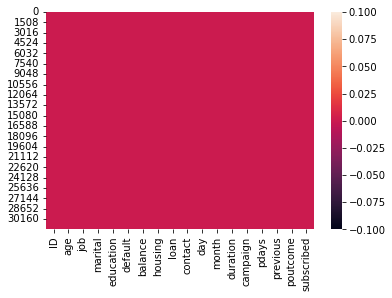

In [99]:
# checking the null values via the maps
sns.heatmap(df_train.isnull())

In [100]:
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [101]:
df_train.nunique().to_frame("No. of unique value")

,No. of unique value
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [102]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [103]:
# seperating the categorical and the numerical data. 

categorical_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=="object": 
        categorical_col.append(i)
print("Categorical Columns :  ",categorical_col)
print("/n")

numerical_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i] != "object": 
        numerical_col.append(i)
print("Numerical Columns :  ",numerical_col)
print("/n")

Categorical Columns :   ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
/n
Numerical Columns :   ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
/n


<AxesSubplot:xlabel='job', ylabel='count'>

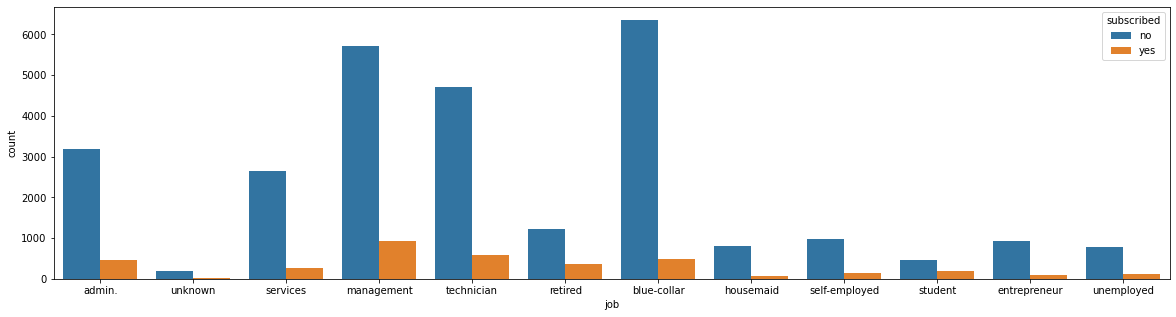

In [104]:
# Checking the distribution of the people who belongs to which job category in the pclass.
plt.figure(figsize=(20,5))
sns.countplot('job',hue='subscribed',data= df_train)

In [105]:
#It is observed from the plot that the max of people belongs to the blue collor job where as people who have subscribed belongs to management Also it is noticed tha retired people are less in no. but they have shown their interest in the plam. 

<AxesSubplot:xlabel='education', ylabel='count'>

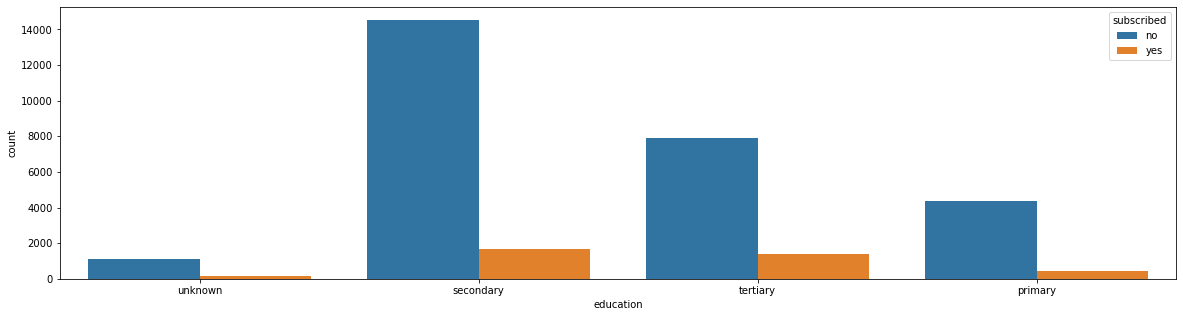

In [106]:
# Checking the distribution of the people who belongs to which job category in the pclass.
plt.figure(figsize=(20,5))
sns.countplot('education',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='default', ylabel='count'>

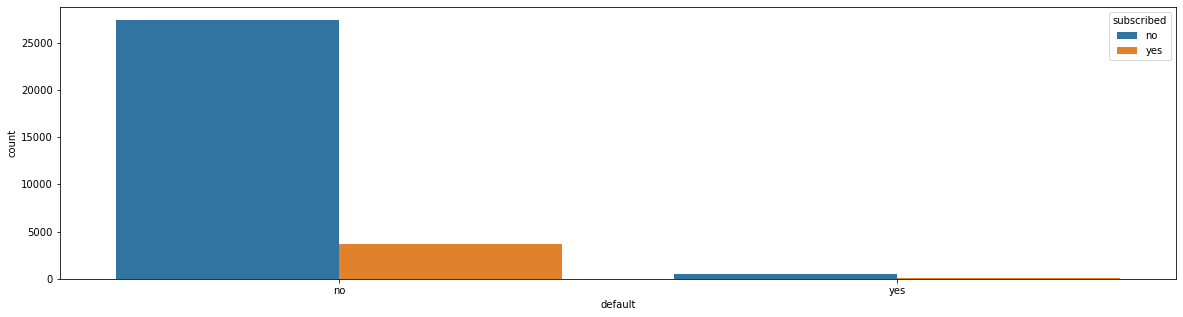

In [107]:
plt.figure(figsize=(20,5))
sns.countplot('default',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='housing', ylabel='count'>

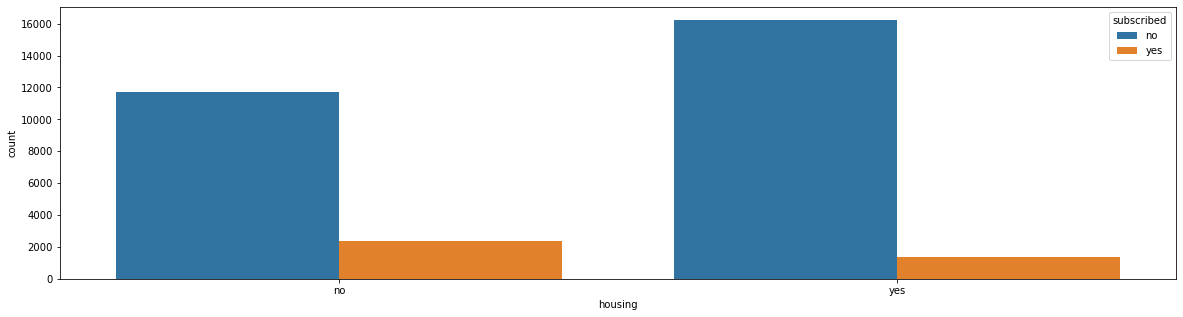

In [108]:
plt.figure(figsize=(20,5))
sns.countplot('housing',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='loan', ylabel='count'>

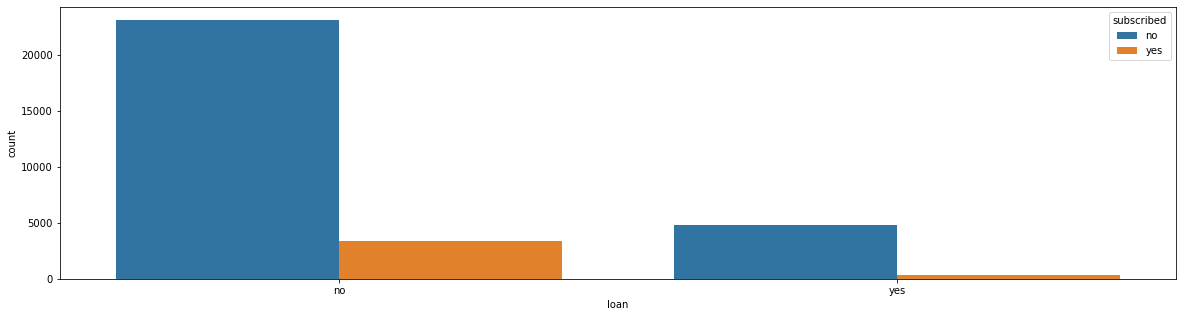

In [109]:
plt.figure(figsize=(20,5))
sns.countplot('loan',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='contact', ylabel='count'>

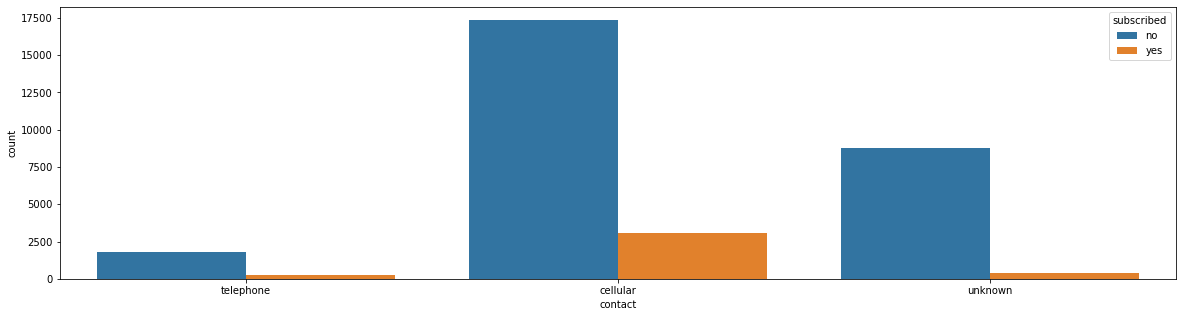

In [110]:
plt.figure(figsize=(20,5))
sns.countplot('contact',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='month', ylabel='count'>

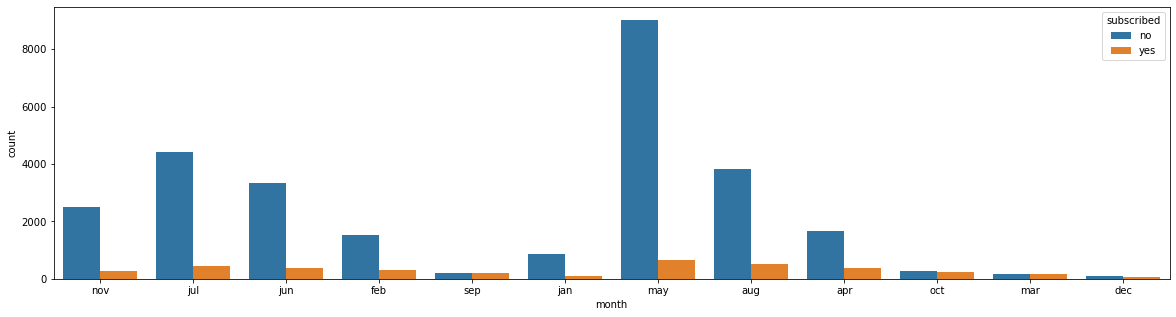

In [111]:
plt.figure(figsize=(20,5))
sns.countplot('month',hue='subscribed',data= df_train)

The most number of people belongs to month of may who have subsbribed.

<AxesSubplot:xlabel='contact', ylabel='count'>

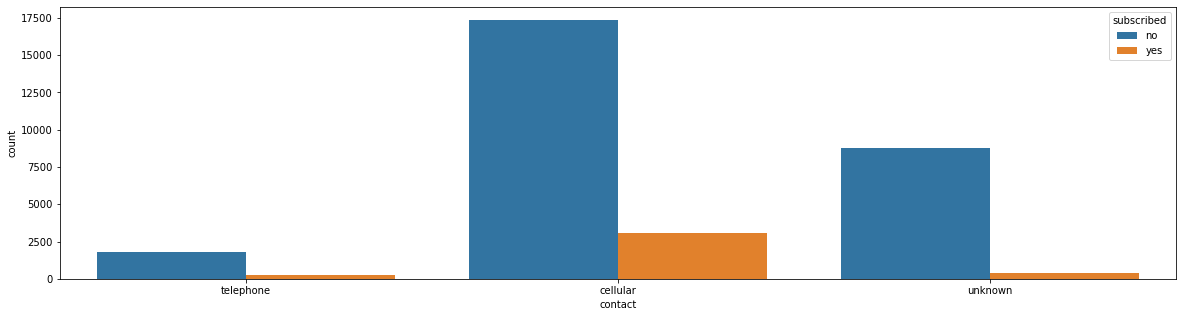

In [112]:
plt.figure(figsize=(20,5))
sns.countplot('contact',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='default', ylabel='count'>

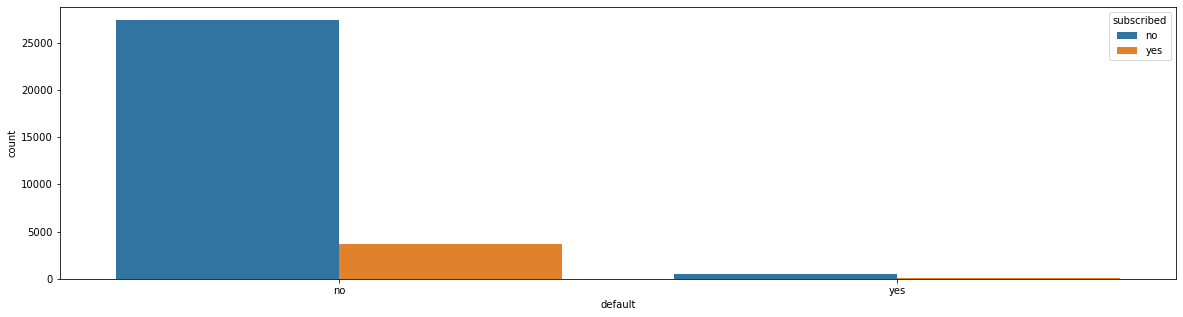

In [113]:
plt.figure(figsize=(20,5))
sns.countplot('default',hue='subscribed',data= df_train)

<AxesSubplot:xlabel='marital', ylabel='count'>

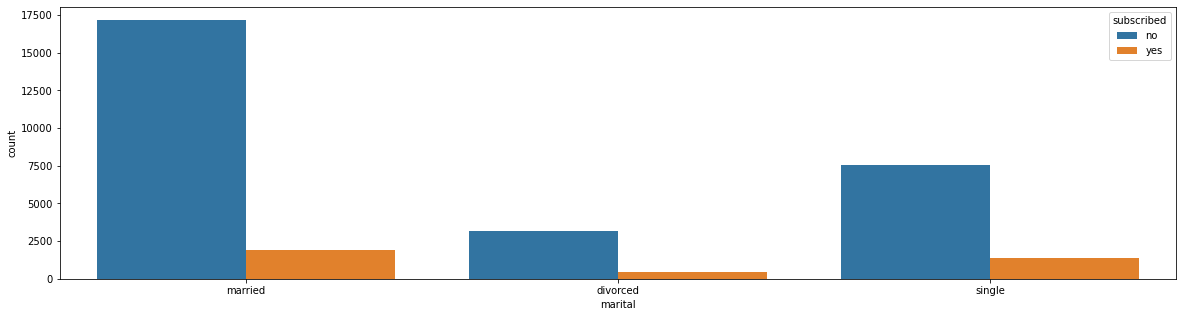

In [114]:
plt.figure(figsize=(20,5))
sns.countplot('marital',hue='subscribed',data= df_train)

In [115]:
categorical_col = df_train.select_dtypes(include=['object']).columns

for i in categorical_col: 
    print(df_train[i].value_counts())
    print('\n')

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, dtype: int64


cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int

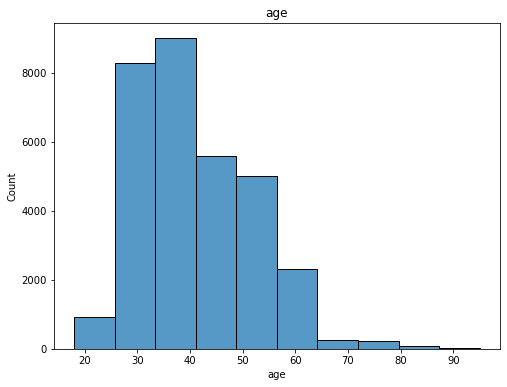

In [116]:
#Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='age',bins = 10)
plt.title('age')
plt.show()

It is observed that the most of the people are from 30-40.

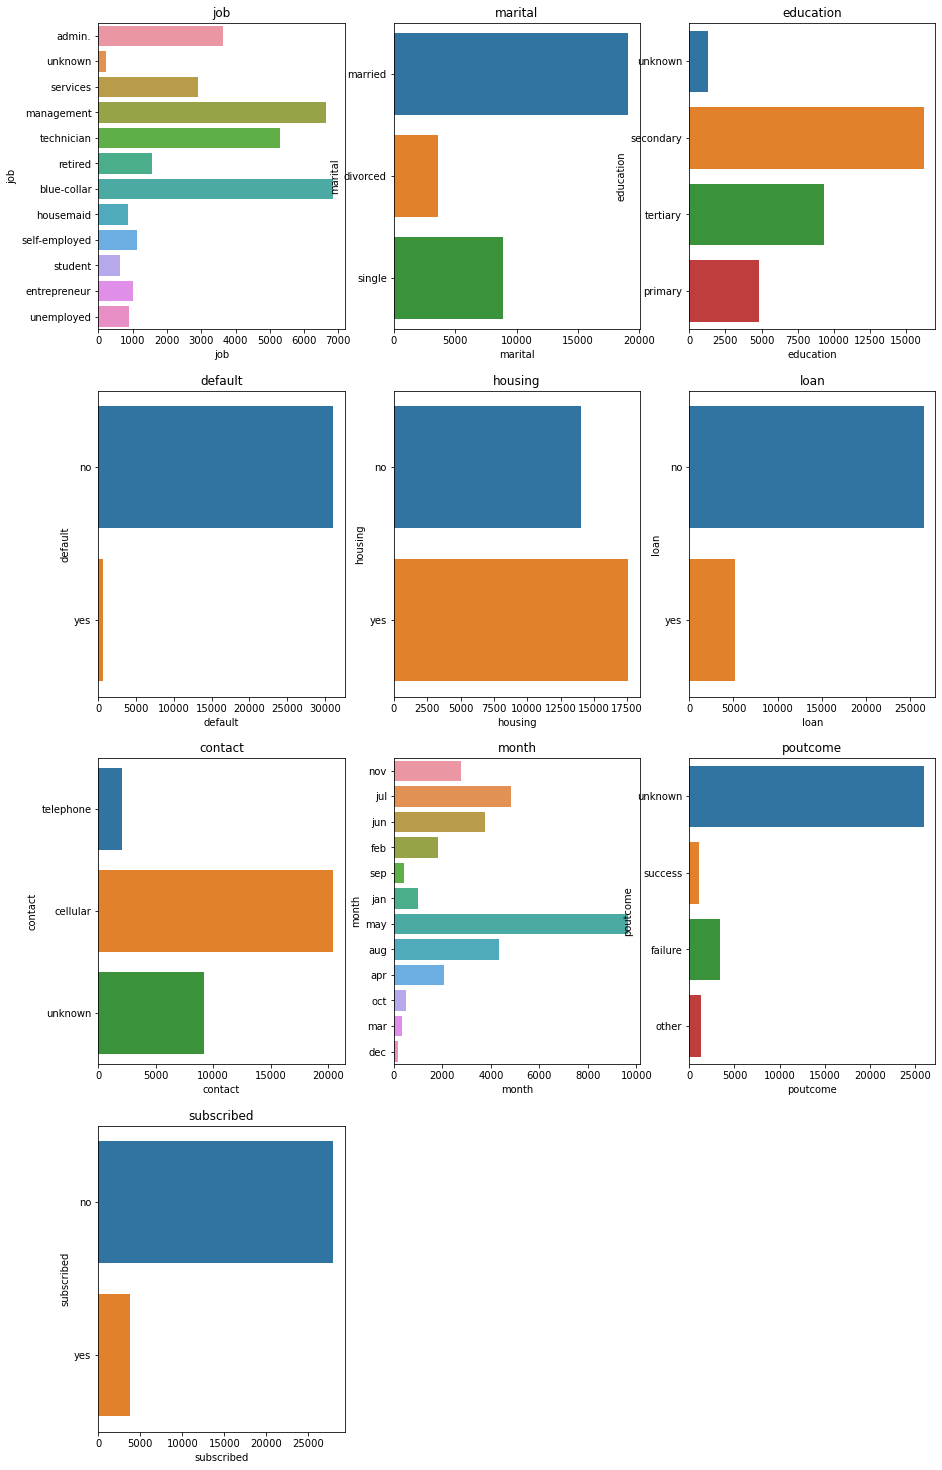

In [117]:
#Representing the categorical_features 
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1 
for categorical_features in categorical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_features, data=df_train)
    plt.xlabel(categorical_features)
    plt.title(categorical_features)
    plotnumber+=1
plt.show()


Observation : 
- employment- max. no of the people belongs to the blue-collor and the management category
- marital - highest no. of people are married in the given dataframe.
- education - most number of people have just completed the secondary education 
- contact- most no of people uses the cellular as the Type of communication
- default : most number of people fall under no category. 
- housing : most no. of people has opted for the housing loan 
- laon : max people have not opted for the personal loan 
- month : most of the people wants to be contacted in the month of may 
- poutcome : the outcome of previous marketing went unkown 
- subscribed : the maximum no. of people didn't subscribe for the plan.     

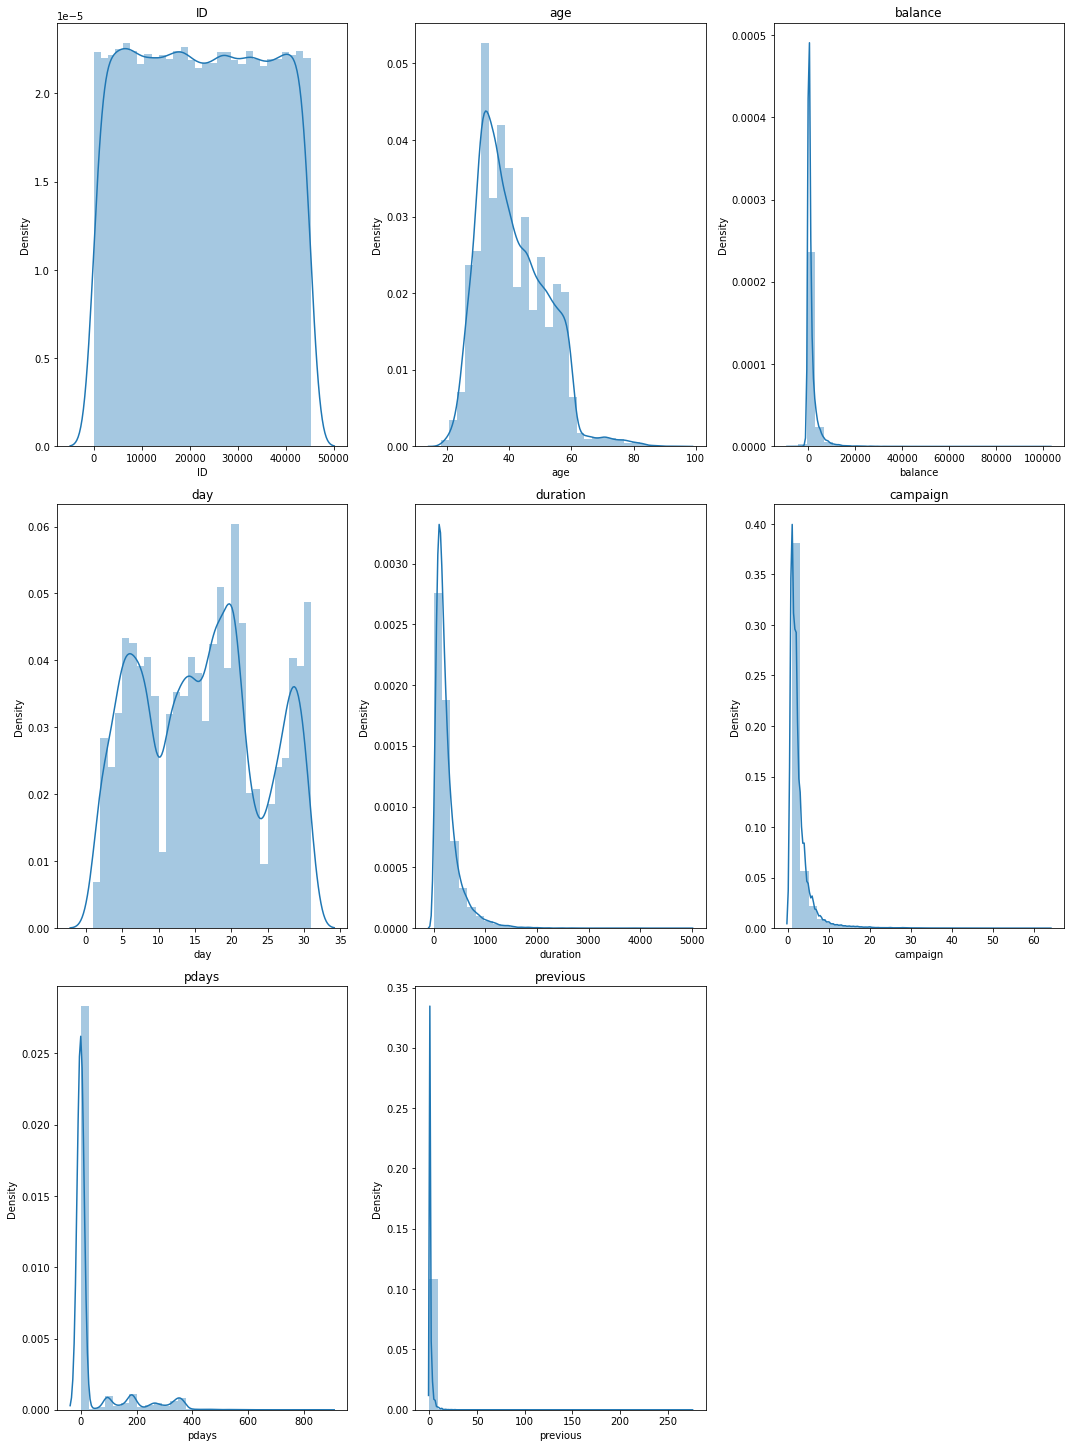

In [118]:
# Distribution of the numerical_col:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[numerical_feature], bins=30)
    plt.xlabel(numerical_feature)
    plt.title(numerical_feature)
    plotnumber += 1
plt.tight_layout()
plt.show()

Observation: 
- it seems age, days are distributed normally. 
- balance, duration, campaigns, pdays and previous skewed to the left. 

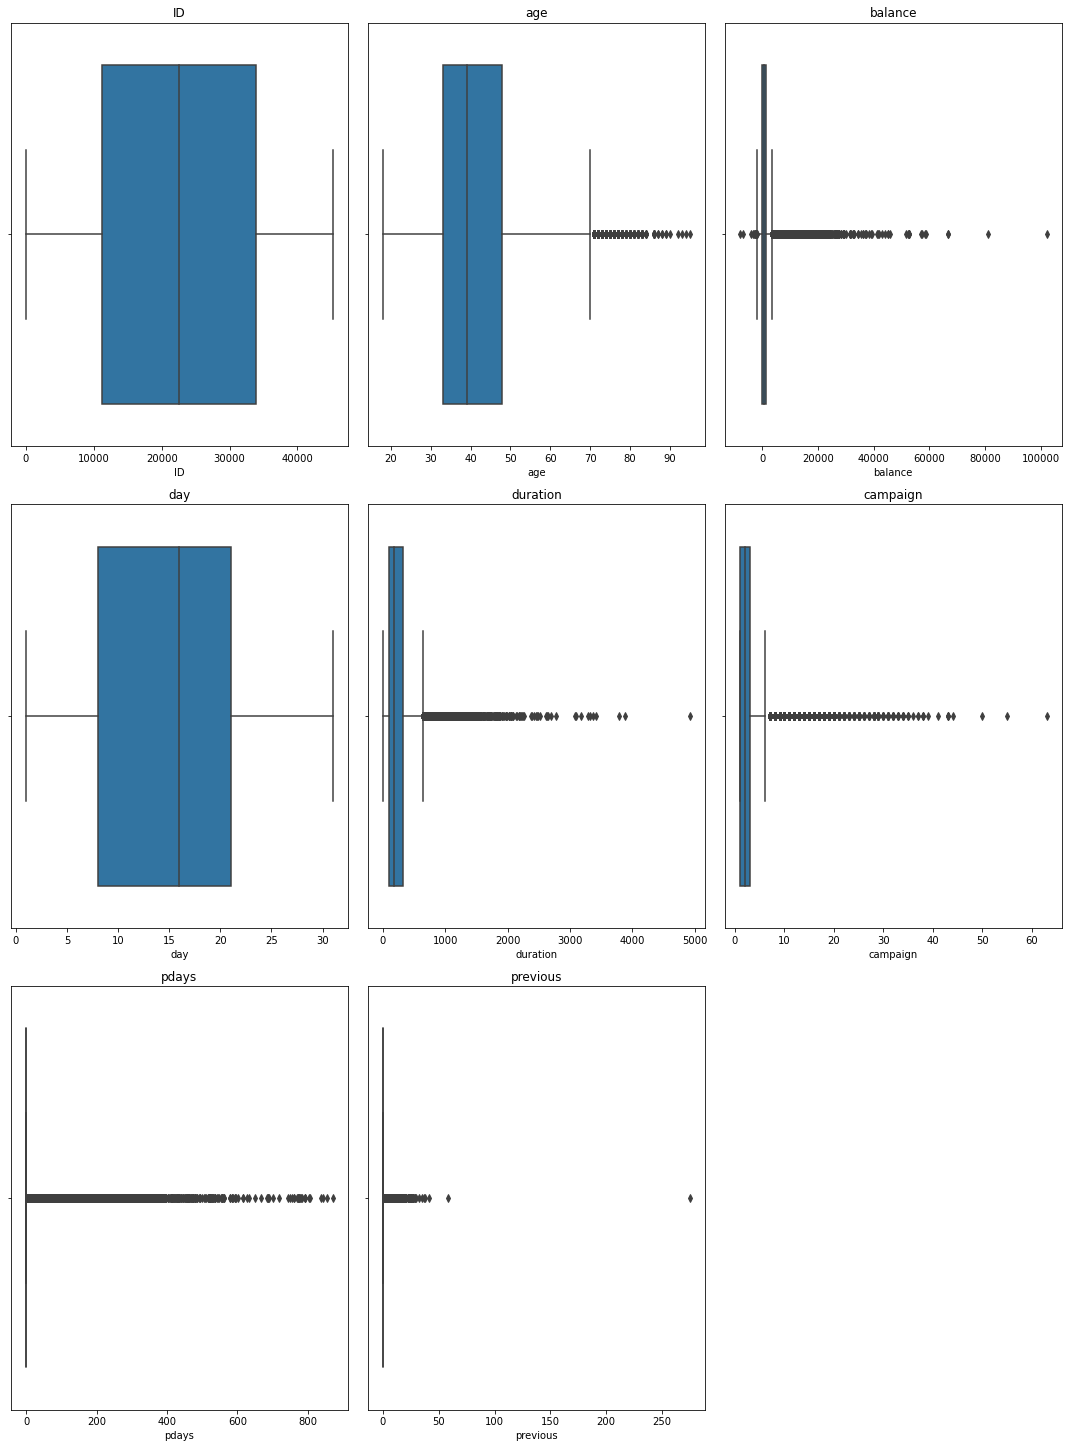

In [119]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plt.title(numerical_feature)
    plotnumber += 1
plt.tight_layout()
plt.show()



no     27932
yes     3715
Name: subscribed, dtype: int64


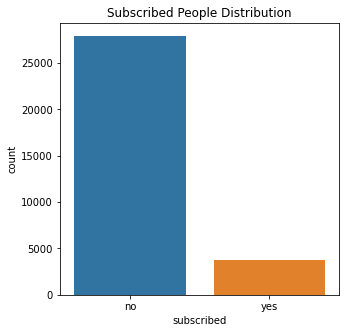

In [120]:
# check if the target variable is balanced or not. 

plt.figure(figsize=(5, 5))
sns.countplot(x='subscribed', data=df_train)
plt.title('Subscribed People Distribution')
print(df_train['subscribed'].value_counts())
plt.show()

In [121]:
#It is observed that the data is not evenly distributed. 

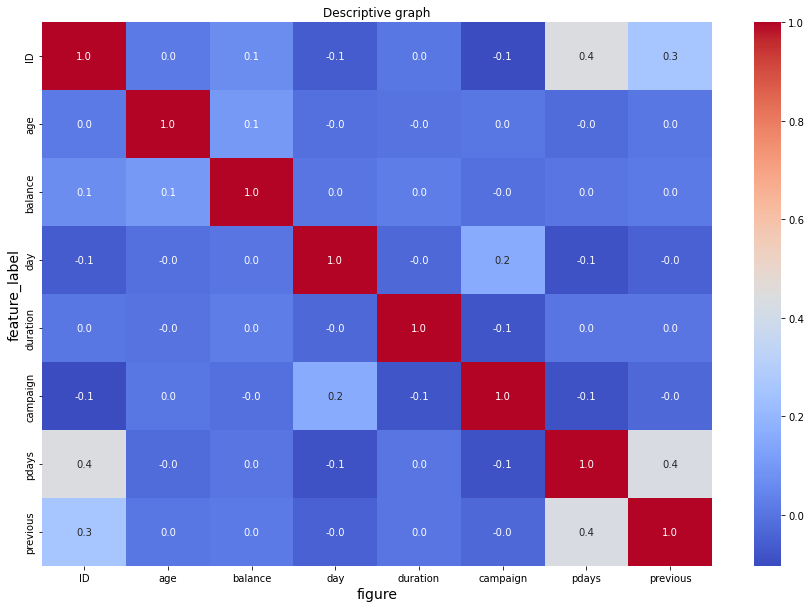

In [122]:
# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

In [123]:
#there are no realtions between the features.

In [124]:
# Removing the id from the columns. 
df_train.drop('ID',axis=1,inplace=True)

df_train.drop_duplicates(inplace=True)

In [125]:
df_train.shape

(31647, 17)

In [126]:
df_train.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [127]:
# Encoding the categorical columns
df_train = df_train.replace({
    'marital': {'married': 1, 'single': 0, 'divorced':2},
    'education': {'secondary': 3, 'tertiary': 2, 'primary':1 , 'unknown':0 },
    'default' : {'no': 1, 'yes': 0},
    'housing':  {'no': 1, 'yes': 0},
    'loan': {'no': 1, 'yes': 0},
    'contact' : {'cellular': 1, 'unknown':2 , 'telephone': 3},
    'month': {'jan':1,'feb':2,'March':3,'April':4,'May':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
    'poutcome': {'unknown':0,'failure':1,'other':2,'success':4},
    'subscribed':{'no':1,'yes':0}
})

In [128]:
df_train.skew()

age            0.681607
marital        0.100071
education     -0.948781
default       -7.149903
balance        7.995696
housing        0.223918
loan          -1.833474
contact        1.162351
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome       3.169707
subscribed    -2.377445
dtype: float64

In [ ]:
Observation of the skewness : the threshold is taken as +/-65. 

In [130]:
from scipy.stats import zscore

z_score = zscore(df_train[['age','balance','campaign','pdays','previous','poutcome']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df_train[filtering_entry]

df_train.describe()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,0.832780,2.277688,0.981515,1363.890258,0.444371,0.837868,1.419345,15.835466,258.113534,2.765697,39.576042,0.574272,0.322621,0.882611
std,10.625134,0.607186,0.868088,0.134700,3028.304293,0.496904,0.368578,0.610632,8.337097,257.118973,3.113830,99.317592,2.422529,0.839598,0.321888
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,1.000000,73.000000,0.000000,1.000000,1.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,3.000000,1.000000,450.000000,0.000000,1.000000,1.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000
75%,48.000000,1.000000,3.000000,1.000000,1431.000000,1.000000,1.000000,2.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000,1.000000
max,95.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,3.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.000000,1.000000


In [131]:
#threshold=3
np.where(z>3)

(array([    3,    21,    26, ..., 31622, 31622, 31645], dtype=int64),
 array([5, 2, 1, ..., 3, 5, 4], dtype=int64))

In [132]:
z.iloc[31622,1]

0.4699436016695701

In [133]:
df = df_train[(z < 3).all(axis=1)]
print(df_train.shape)

(31647, 17)


In [134]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,1,0,1,1933,1,1,3,19,11,44,2,-1,0,0,1
1,31,unknown,1,3,1,3,1,1,1,20,7,91,2,-1,0,0,1
2,27,services,1,3,1,891,0,1,1,18,7,240,1,-1,0,0,1
3,57,management,2,2,1,3287,1,1,1,22,6,867,1,84,3,4,0
4,31,technician,1,3,1,119,0,1,1,4,2,380,1,-1,0,0,1


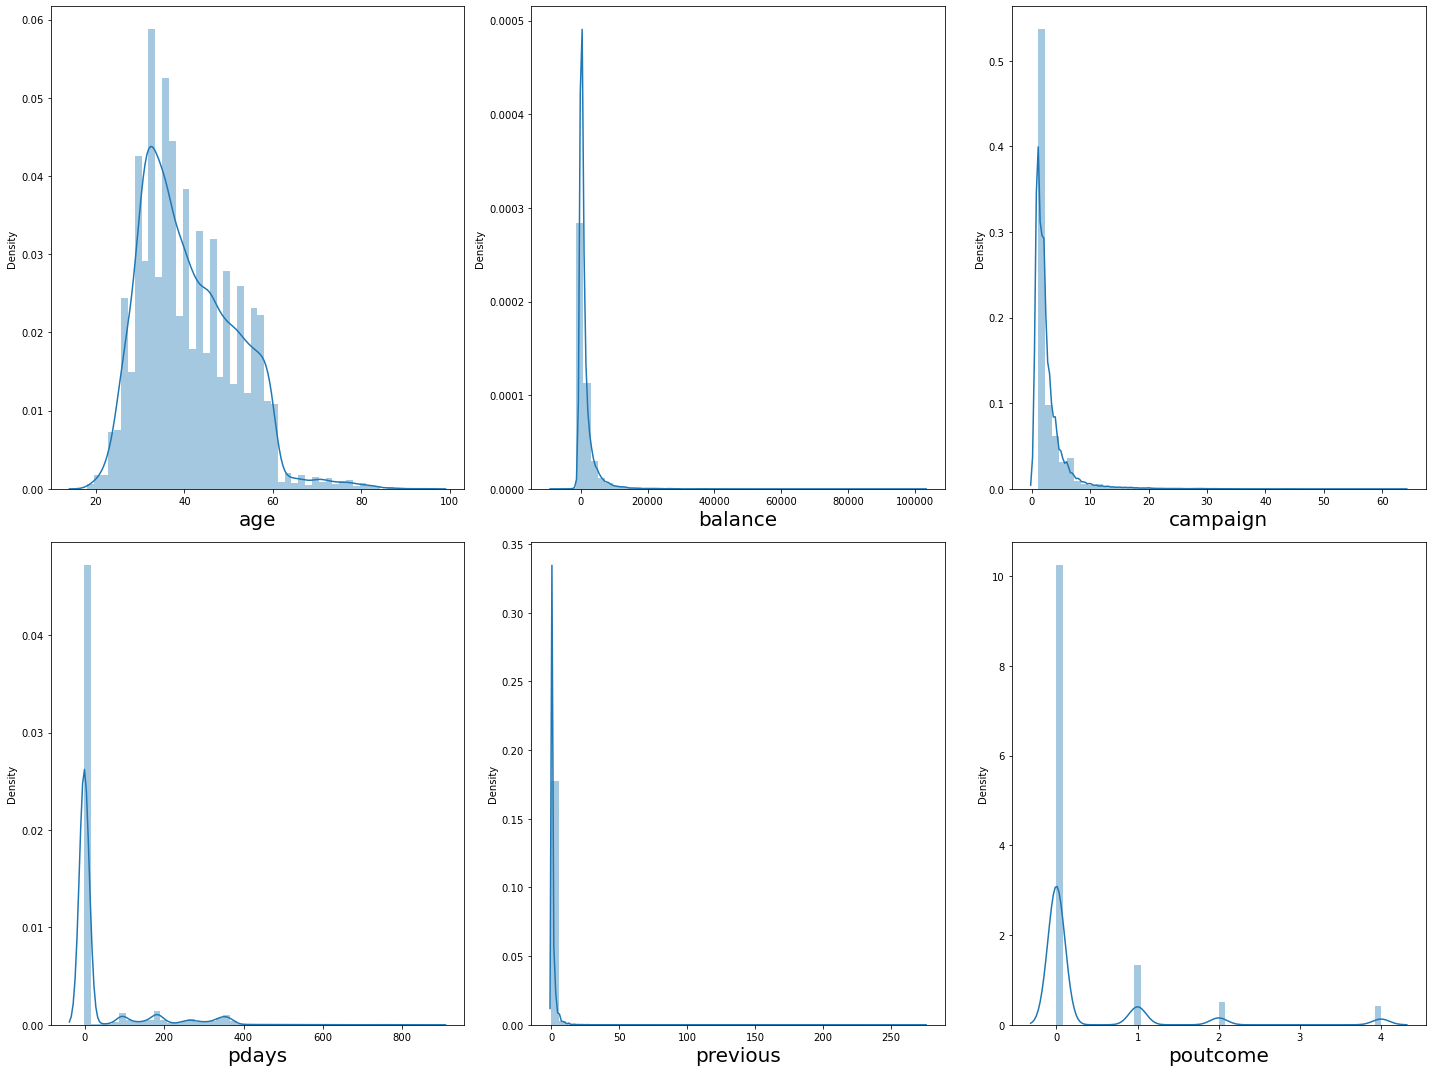

In [137]:
plt.figure(figsize=(20,15))
plotnumber = 1 

for column in df_train [['age','balance','campaign','pdays','previous','poutcome']]: 
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
        plotnumber +=1
plt.tight_layout()
plt.show()